In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

plt.style.use('seaborn')

# Import Raw Data

In [2]:
grpdata = pd.read_csv('data.csv', index_col='GRPRatingsDate')
grpdata.head()

,GRP
GRPRatingsDate,
2007-06-17,243.60
2007-06-24,263.19
2007-07-01,269.89
2007-07-08,252.88
2007-07-15,303.46


# Exploratory Data Analysis

In [3]:
data_train = grpdata[:'2008-10-26']
data_test = grpdata['2008-11-02':]

print('X_train size: ', data_train.size)
print('X_test size: ', data_test.size)

X_train size:  72
X_test size:  20


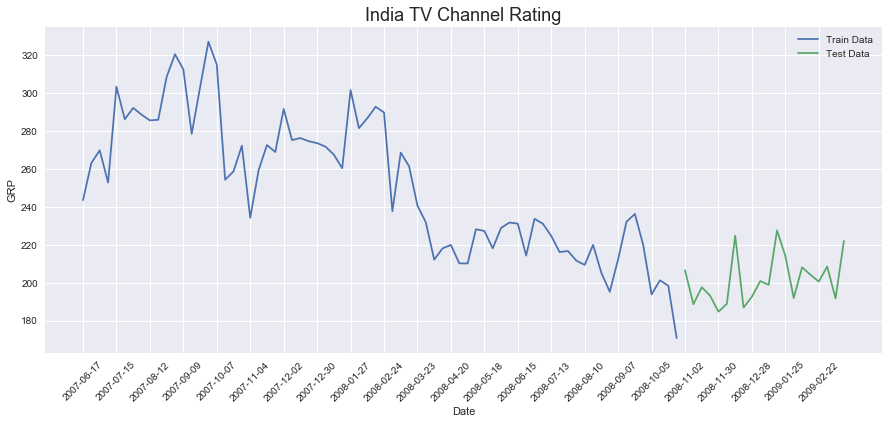

In [4]:
fig, ax = plt.subplots(figsize=(15, 6))
l1, = ax.plot(data_train, label='Train Data')
l2, = ax.plot(data_test, label='Test Data')
ax.set_title('India TV Channel Rating', fontsize=18)
ax.set_xlabel('Date')
ax.set_ylabel('GRP')
ax.set_xticks(grpdata.index[::4])
ax.tick_params(axis='x', rotation=45)
ax.legend()
plt.show()

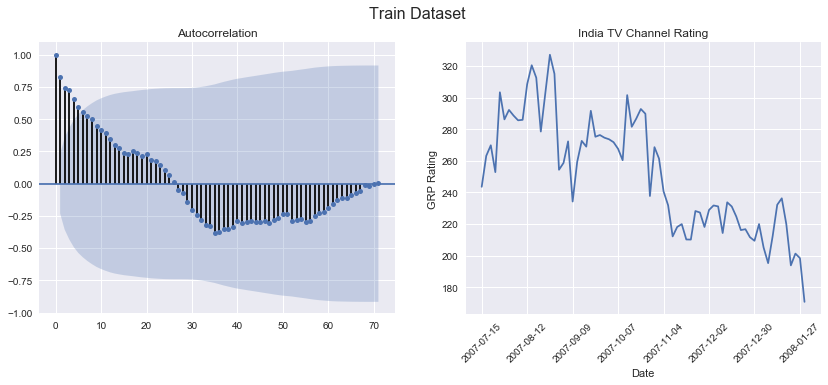

In [5]:
fig, axes = plt.subplots(figsize=(7 * 2, 5), ncols=2)

ax = axes.flatten()[0]
plot_acf(data_train, ax=ax)

ax = axes.flatten()[1]
data_train.plot(ax=ax, legend=None)
ax.set_title('India TV Channel Rating')
ax.set_ylabel('GRP Rating')
ax.set_xlabel('Date')
ax.set_xticklabels(data_train.index[::4])
ax.tick_params(axis='x', rotation=45)

fig.suptitle('Train Dataset', fontsize=16)
plt.show()

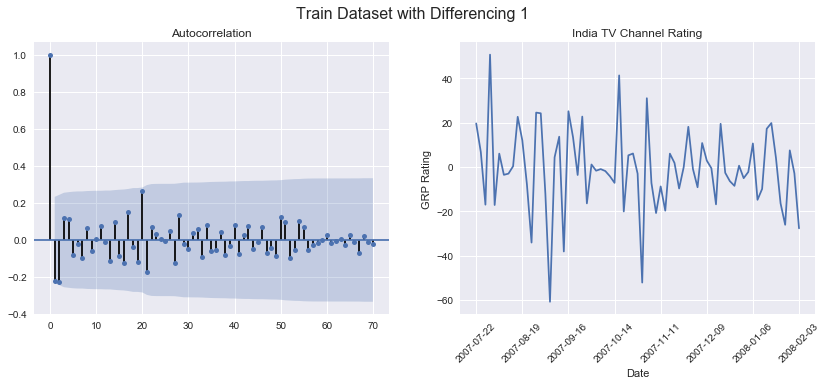

In [6]:
fig, axes = plt.subplots(figsize=(7 * 2, 5), ncols=2)

ax = axes.flatten()[0]
plot_acf(data_train.diff().dropna(), ax=ax)

ax = axes.flatten()[1]
data_train.diff().dropna().plot(ax=ax, legend=None)
ax.set_title('India TV Channel Rating')
ax.set_ylabel('GRP Rating')
ax.set_xlabel('Date')
ax.set_xticklabels(data_train.diff().dropna().index[::4])
ax.tick_params(axis='x', rotation=45)

fig.suptitle('Train Dataset with Differencing 1', fontsize=16)
plt.show()

# Import Prediction Results From R

In [7]:
comparison = pd.read_csv('ts_result.csv')
comparison['Name'] = comparison['Method'] + ' (' + pd.Series(comparison.index).apply(str) + ')'
comparison = comparison.set_index('Name')
comparison

,Method,Frequency,Model,RMSE,MAPE,MAD,Error,Forecast
Name,,,,,,,,
Exponential Smoothing (0),Exponential Smoothing,52.0,Simple exponential smoothing,25.167875,0.105097,199.975971,NaN,"179.786825589573,179.786825589573,179.78682558..."
Exponential Smoothing (1),Exponential Smoothing,26.0,Simple exponential smoothing,25.167875,0.105097,199.975971,NaN,"179.786825589573,179.786825589573,179.78682558..."
Exponential Smoothing (2),Exponential Smoothing,13.0,Simple exponential smoothing,25.167875,0.105097,199.975971,NaN,"179.786825589573,179.786825589573,179.78682558..."
Exponential Smoothing (3),Exponential Smoothing,52.0,"ETS(M,N,N)",25.185458,0.105197,21.878417,NaN,"179.76658270902,179.76658270902,179.7665827090..."
Exponential Smoothing (4),Exponential Smoothing,26.0,"ETS(M,N,N)",25.185458,0.105197,21.878417,NaN,"179.76658270902,179.76658270902,179.7665827090..."
Exponential Smoothing (5),Exponential Smoothing,13.0,"ETS(M,N,N)",25.185458,0.105197,21.878417,NaN,"179.76658270902,179.76658270902,179.7665827090..."
ARIMA (6),ARIMA,52.0,"ARIMA(0,1,1)",25.329377,0.106021,22.043938,NaN,"179.601061726419,179.601061726419,179.60106172..."
ARIMA (7),ARIMA,26.0,"ARIMA(0,1,1)",25.329377,0.106021,22.043938,NaN,"179.601061726419,179.601061726419,179.60106172..."
ARIMA (8),ARIMA,13.0,"ARIMA(0,1,1)",25.329377,0.106021,22.043938,NaN,"179.601061726419,179.601061726419,179.60106172..."


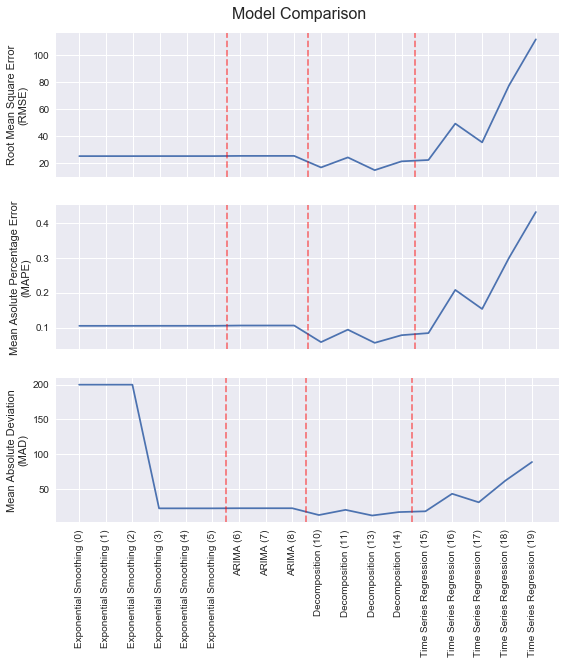

In [8]:
data = comparison[comparison['Model'].notnull()].copy()

fig, axes = plt.subplots(figsize=(9, 9), nrows=3, sharex=True)

ax=axes.flatten()[0]
data['RMSE'].plot(ax=ax)
ax.set_ylabel('Root Mean Square Error\n(RMSE)')
ax.axvline(5.5, color='r', linestyle='--', alpha=0.5)
ax.axvline(8.5, color='r', linestyle='--', alpha=0.5)
ax.axvline(12.5, color='r', linestyle='--', alpha=0.5)

ax=axes.flatten()[1]
data['MAPE'].plot(ax=ax)
ax.set_ylabel('Mean Asolute Percentage Error\n(MAPE)')
ax.axvline(5.5, color='r', linestyle='--', alpha=0.5)
ax.axvline(8.5, color='r', linestyle='--', alpha=0.5)
ax.axvline(12.5, color='r', linestyle='--', alpha=0.5)

ax=axes.flatten()[2]
data['MAD'].plot(ax=ax, rot=90)
ax.set_xticks(range(0, data.shape[0] + 1))
ax.set_xticklabels(data.index)
ax.set_xlabel('')
ax.set_ylabel('Mean Absolute Deviation\n(MAD)')
ax.axvline(5.5, color='r', linestyle='--', alpha=0.5)
ax.axvline(8.5, color='r', linestyle='--', alpha=0.5)
ax.axvline(12.5, color='r', linestyle='--', alpha=0.5)

fig.suptitle('Model Comparison', fontsize=16, y = 0.92)

plt.show()

In [9]:
data_train = grpdata.copy()
data_train['2008-11-02':] = np.nan

data_test = grpdata.copy()
data_test[:'2008-10-26'] = np.nan

def plot_forecast(method):
    fig, ax = plt.subplots(figsize=(15, 6))

    ax.plot(data_train, label='Train')
    ax.plot(data_test, label='Test')

    forecasts = comparison.query('Method == @method')
    condition = forecasts['Model'].notnull()
    forecasts = forecasts[condition]['Forecast']
    forecasts = forecasts.apply(lambda x: str(x).split(','))
    forecasts = forecasts.apply(lambda x: list(map(float, x)))

    for n in range(len(forecasts)):
        data = data_test.copy()
        name = forecasts.index[n]
        model_name = comparison.loc[name,'Model']
        freq = comparison.loc[name,'Frequency']
        
        if not np.isnan(freq):
            legend_label = '{} with frequency {}'.format(model_name, int(freq))
        else:
            legend_label = model_name
            
        data['2008-11-02':] = np.array(forecasts[n]).reshape(20, 1)
        
        ax.plot(data, label=legend_label, alpha = 0.8, ls='--')

    ax.set_xticks(grpdata.index[::4])
    ax.set_xlabel('Date')
    ax.set_ylabel('GRP Rating')
    ax.legend(loc='upper right')
    ax.set_title(method, fontsize=16)
    ax.tick_params(axis='x', rotation=80)
    
    plt.show()

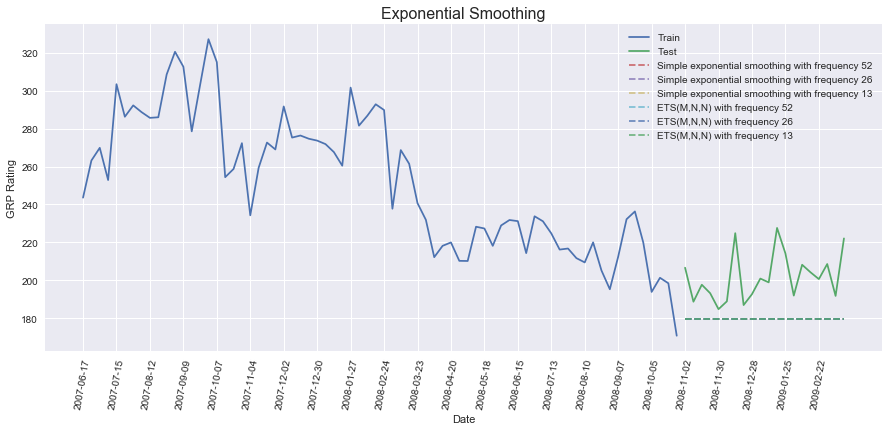

In [10]:
plot_forecast('Exponential Smoothing')

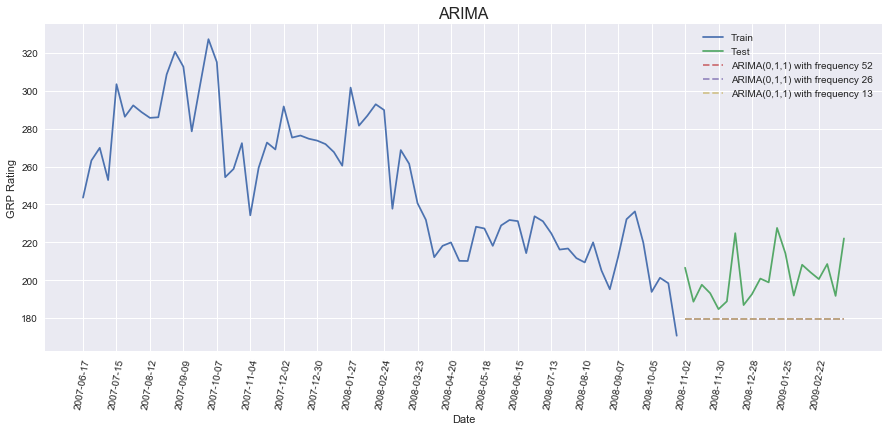

In [11]:
plot_forecast('ARIMA')

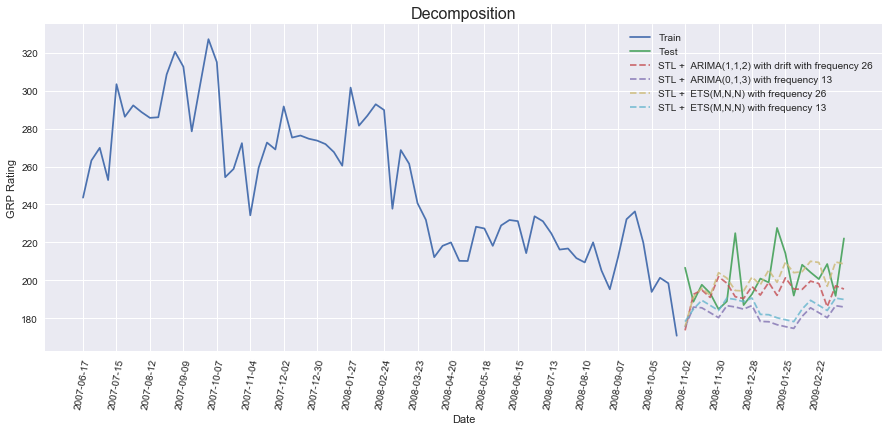

In [12]:
plot_forecast('Decomposition')

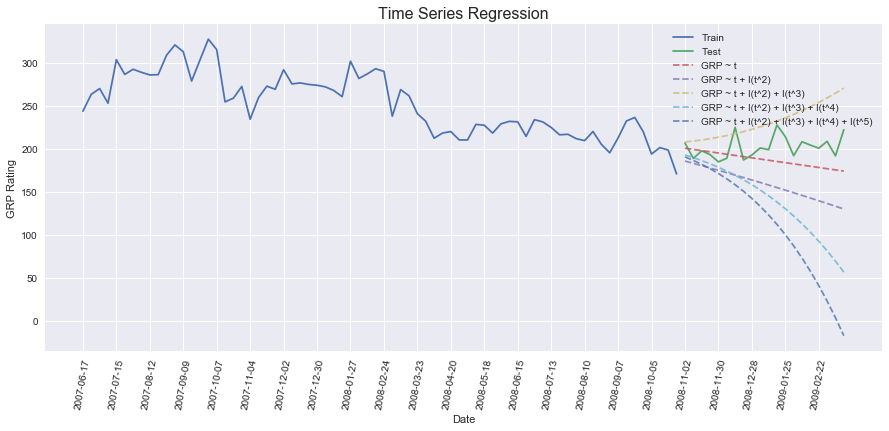

In [13]:
plot_forecast('Time Series Regression')

# Best Method - Decomposition

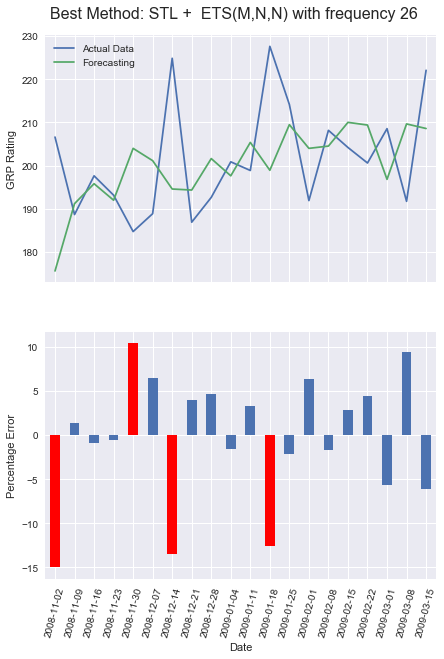

In [14]:
best_method = 'Decomposition (13)'
best_method_information = comparison.loc[best_method]

actual = grpdata.copy()['2008-11-02':]['GRP']
pred = best_method_information['Forecast'].split(',')
pred = pd.to_numeric(pred)
pred = pd.Series(pred, index=actual.index)
percentage_changes = (pred - actual)/actual*100

fig, (ax1, ax2) = plt.subplots(figsize=(7,10), nrows=2, sharex=True)

ax1.plot(actual, label='Actual Data')
ax1.plot(pred, label='Forecasting')
ax1.set_ylabel('GRP Rating')
ax1.legend()

percentage_changes.plot.bar(ax=ax2, color='#4C72B0')
ax2.set_xlabel('Date')
ax2.tick_params(axis='x', rotation=75)
ax2.set_ylabel('Percentage Error')

for index, rect in enumerate(ax2.patches):
    deviation = rect.get_height()
    if np.abs(deviation) > 10:
        rect.set_facecolor('red')

title = 'Best Method: {} with frequency {}'.format(best_method_information['Model'], 
                                                   int(best_method_information['Frequency']))
fig.suptitle(title, fontsize=16, y = 0.92)
plt.show()